# Machine Learning of AirBNB Data
### importing of libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import accuracy_score

from collections import Counter


from sklearn import neighbors
from math import sqrt


air_data = pd.read_csv("listings_june.csv")
air_data.shape

(4238, 74)

# K-Nearest Neighbours
### Converting price to numerical data

In [2]:
air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')
air_data["price"] = pd.to_numeric(air_data["price"], downcast='float')

C:\Users\junwe\AppData\Local\Temp/ipykernel_25372/1657301221.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["price"]=  air_data['price'].str.replace(',', '').str.replace('$', '')


### Create new label for number of verification

In [3]:
air_data["num_of_veri"]= air_data["host_verifications"].apply(lambda n: len(n.split(',')))
#air_data["num_of_veri"].head()

### Create new label for number of amenities

In [4]:
air_data["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
##air_data["num_of_amenities"].head()

### Remove NAN values  

In [5]:
air_data["new_ratings"]=air_data["review_scores_rating"].round(1)
possible = pd.DataFrame(air_data[['host_total_listings_count','number_of_reviews_ltm','number_of_reviews','accommodates','num_of_veri','num_of_amenities','price','new_ratings']])

possible.dropna(inplace=True)

y = pd.DataFrame(possible['new_ratings'])
X = pd.DataFrame(possible.drop('new_ratings',axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
rmse_val = [] #to store rmse values for different k

for K in range(25):
    K =K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    KNN=model.fit(X_train,y_train)
    prediction=KNN.predict(X_test)
    error = sqrt(mean_squared_error(y_test,prediction))
    rmse_val.append(error) #store rmse values


    print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
    print('RMSE value for k= ' , K , 'is:', error)
    print("Score  (R^2): ", (model.score(X_test, y_test)))
    print()
    #print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

R2 Value: 0.9271111208840531
RMSE value for k=  1 is: 1.2551321293713862
Score  (R^2):  -0.9277585469059562

R2 Value: 0.5307131480486097
RMSE value for k=  2 is: 1.0716178131920313
Score  (R^2):  -0.40524999254099003

R2 Value: 0.3922810889818824
RMSE value for k=  3 is: 1.0267769833467886
Score  (R^2):  -0.29010777608027105

R2 Value: 0.3097180343844643
RMSE value for k=  4 is: 1.0039319569367315
Score  (R^2):  -0.23333853496754986

R2 Value: 0.27469127214673206
RMSE value for k=  5 is: 0.9705310668994364
Score  (R^2):  -0.15263718715216656

R2 Value: 0.2421307402606162
RMSE value for k=  6 is: 0.9264347612385695
Score  (R^2):  -0.050275966249405

R2 Value: 0.21392669575287526
RMSE value for k=  7 is: 0.913271073458512
Score  (R^2):  -0.020641323089361396

R2 Value: 0.21402752226528698
RMSE value for k=  8 is: 0.9037442443258414
Score  (R^2):  0.0005413472730813051

R2 Value: 0.20218212439804273
RMSE value for k=  9 is: 0.8969380959271904
Score  (R^2):  0.015538619086294392

R2 Value

### Shows that the best K value is 19 as the RMSE is lowest and R^2 is highest among the rest

<AxesSubplot:>

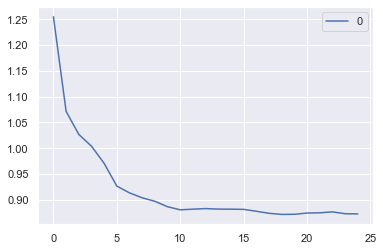

In [7]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [8]:
model = neighbors.KNeighborsRegressor(n_neighbors = 19)
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

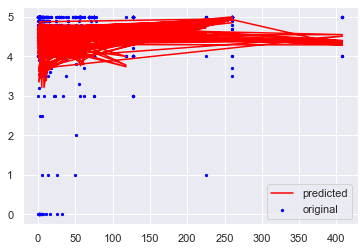

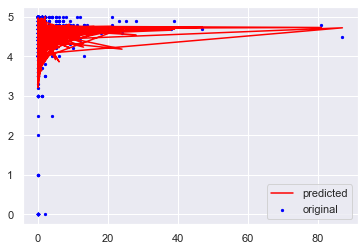

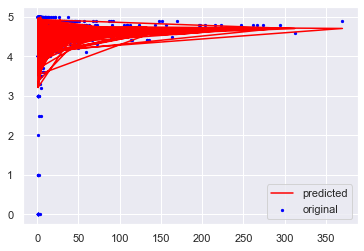

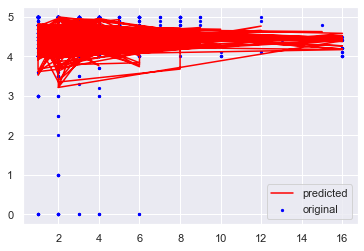

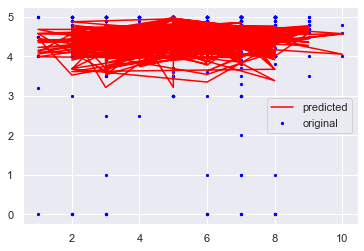

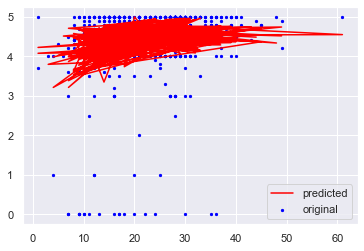

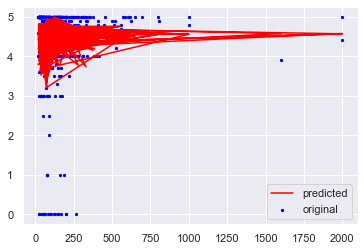

In [9]:
for i in range(7):
    plt.scatter(X_test.iloc[:,i], y_test, s=5, color="blue", label="original")
    plt.plot(X_test.iloc[:,i], prediction, lw=1.5, color="red", label="predicted")
    plt.legend()
    plt.show()

In [10]:
#print('Explained Variance Score:', metrics.explained_variance_score(y_test, prediction))
print('Max Error:', metrics.max_error(y_test, prediction))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, prediction))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, prediction))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, prediction))
print()

Max Error: 4.692
Mean Squared Log Error: 0.08419719670792242
Median Absolute Error: 0.32399999999999984
Mean Poisson Deviance: 0.29404040587374347



In [11]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.14611497288906805
Mean Squared Error (MSE) 	: 0.671576900193842

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07065495819236967
Mean Squared Error (MSE) 	: 0.7594570935378396



In [12]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [13]:
mse = mean_sq_err(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 0.7594570935378396
Root Mean Squared Error (RMSE) 	: 0.8714683548688613


# One Hot Encoding and Random Forest

### Cleaning of Property Type and Neighbourhood 

In [14]:
air_data["property_type"]=air_data['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')
air_data["property_type"] =air_data["property_type"].to_frame()
print(air_data["property_type"].head())
print()

air_data["neighbourhood_cleansed"]=air_data['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')
air_data["neighbourhood_cleansed"] =air_data["neighbourhood_cleansed"].to_frame()
print(air_data["neighbourhood_cleansed"].head())

0    Private room in apartment
1    Private room in apartment
2    Private room in apartment
3        Private room in villa
4        Private room in house
Name: property_type, dtype: object

0      Woodlands
1    Bukit Timah
2      Woodlands
3       Tampines
4       Tampines
Name: neighbourhood_cleansed, dtype: object


C:\Users\junwe\AppData\Local\Temp/ipykernel_25372/3682513931.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["property_type"]=air_data['property_type'].str.replace('[', '').str.replace(']','').str.replace('"','')
C:\Users\junwe\AppData\Local\Temp/ipykernel_25372/3682513931.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["neighbourhood_cleansed"]=air_data['neighbourhood_cleansed'].str.replace('[', '').str.replace(']','').str.replace('"','')


In [15]:
print("Unique NeigbourHoods:")
print(np.unique(air_data[['neighbourhood_cleansed']].values))
print()
print("Unique Property Types:")
print(np.unique(air_data[['property_type']].values))

Unique NeigbourHoods:
['Ang Mo Kio' 'Bedok' 'Bishan' 'Bukit Batok' 'Bukit Merah' 'Bukit Panjang'
 'Bukit Timah' 'Central Water Catchment' 'Choa Chu Kang' 'Clementi'
 'Downtown Core' 'Geylang' 'Hougang' 'Jurong East' 'Jurong West' 'Kallang'
 'Mandai' 'Marine Parade' 'Museum' 'Newton' 'Novena' 'Orchard' 'Outram'
 'Pasir Ris' 'Pioneer' 'Punggol' 'Queenstown' 'River Valley' 'Rochor'
 'Sembawang' 'Sengkang' 'Serangoon' 'Singapore River' 'Southern Islands'
 'Sungei Kadut' 'Tampines' 'Tanglin' 'Toa Payoh' 'Tuas'
 'Western Water Catchment' 'Woodlands' 'Yishun']

Unique Property Types:
['Boat' 'Campsite' 'Chambre privée dans\xa0: appartement'
 'Entire apartment' 'Entire bungalow' 'Entire chalet' 'Entire condominium'
 'Entire guest suite' 'Entire guesthouse' 'Entire home/apt' 'Entire house'
 'Entire loft' 'Entire place' 'Entire serviced apartment'
 'Entire townhouse' 'Entire villa' 'Private room'
 'Private room in apartment' 'Private room in bed and breakfast'
 'Private room in boat' 'Private ro

### Group Numerical Data for the Random Forest

In [16]:
air_num = pd.DataFrame(air_data[['num_of_amenities','num_of_veri','price','number_of_reviews','beds','accommodates']])
air_data['ratings']=pd.DataFrame(air_data[["new_ratings"]])
air_data['ratings'].head()
air_rate = air_data[['ratings']]
print(air_rate.head())

   ratings
0      5.0
1      4.6
2      4.9
3      4.4
4      4.2


### Group the Categorical data  for Random Forest

In [17]:
air_cat = air_data[['property_type','neighbourhood_cleansed']]
air_cat.head()

,property_type,neighbourhood_cleansed
0,Private room in apartment,Woodlands
1,Private room in apartment,Bukit Timah
2,Private room in apartment,Woodlands
3,Private room in villa,Tampines
4,Private room in house,Tampines


In [18]:
ohe = OneHotEncoder()
ohe.fit(air_cat)
air_cat_ohe = pd.DataFrame(ohe.transform(air_cat).toarray(),columns=ohe.get_feature_names(air_cat.columns))
#print(air_cat_ohe.head())
#print('##########################################################\n\n\n\n')
print(air_cat_ohe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 99 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   property_type_Boat                                4238 non-null   float64
 1   property_type_Campsite                            4238 non-null   float64
 2   property_type_Chambre privée dans : appartement   4238 non-null   float64
 3   property_type_Entire apartment                    4238 non-null   float64
 4   property_type_Entire bungalow                     4238 non-null   float64
 5   property_type_Entire chalet                       4238 non-null   float64
 6   property_type_Entire condominium                  4238 non-null   float64
 7   property_type_Entire guest suite                  4238 non-null   float64
 8   property_type_Entire guesthouse                   4238 non-null   float64
 9   property_type_Entir

### Combining OneHot Encoded values and Numerical Data 

In [19]:
air_ohe=pd.concat([air_num,air_cat_ohe,air_rate],sort=False,axis=1).reindex(index=air_num.index)
#air_ohe=pd.concat([air_cat_ohe,air_rate],sort=False,axis=1).reindex(index=air_rate.index)
air_ohe.head()

,num_of_amenities,num_of_veri,price,number_of_reviews,beds,accommodates,property_type_Boat,property_type_Campsite,property_type_Chambre privée dans : appartement,property_type_Entire apartment,...,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,ratings
0,7,9,81.0,1,1.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
1,12,8,80.0,18,1.0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6
2,8,9,67.0,20,1.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.9
3,25,5,177.0,20,3.0,6,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4
4,21,5,81.0,24,1.0,3,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2


In [27]:
air_ohe.dropna(inplace=True)
air_ohe['ratings']=air_ohe['ratings'].round()
y = pd.DataFrame(air_ohe['ratings'])
#y.fillna(1, inplace=True)
y.head()

,ratings
0,5.0
1,5.0
2,5.0
3,4.0
4,4.0


C:\Users\junwe\AppData\Local\Temp/ipykernel_25372/1888160009.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


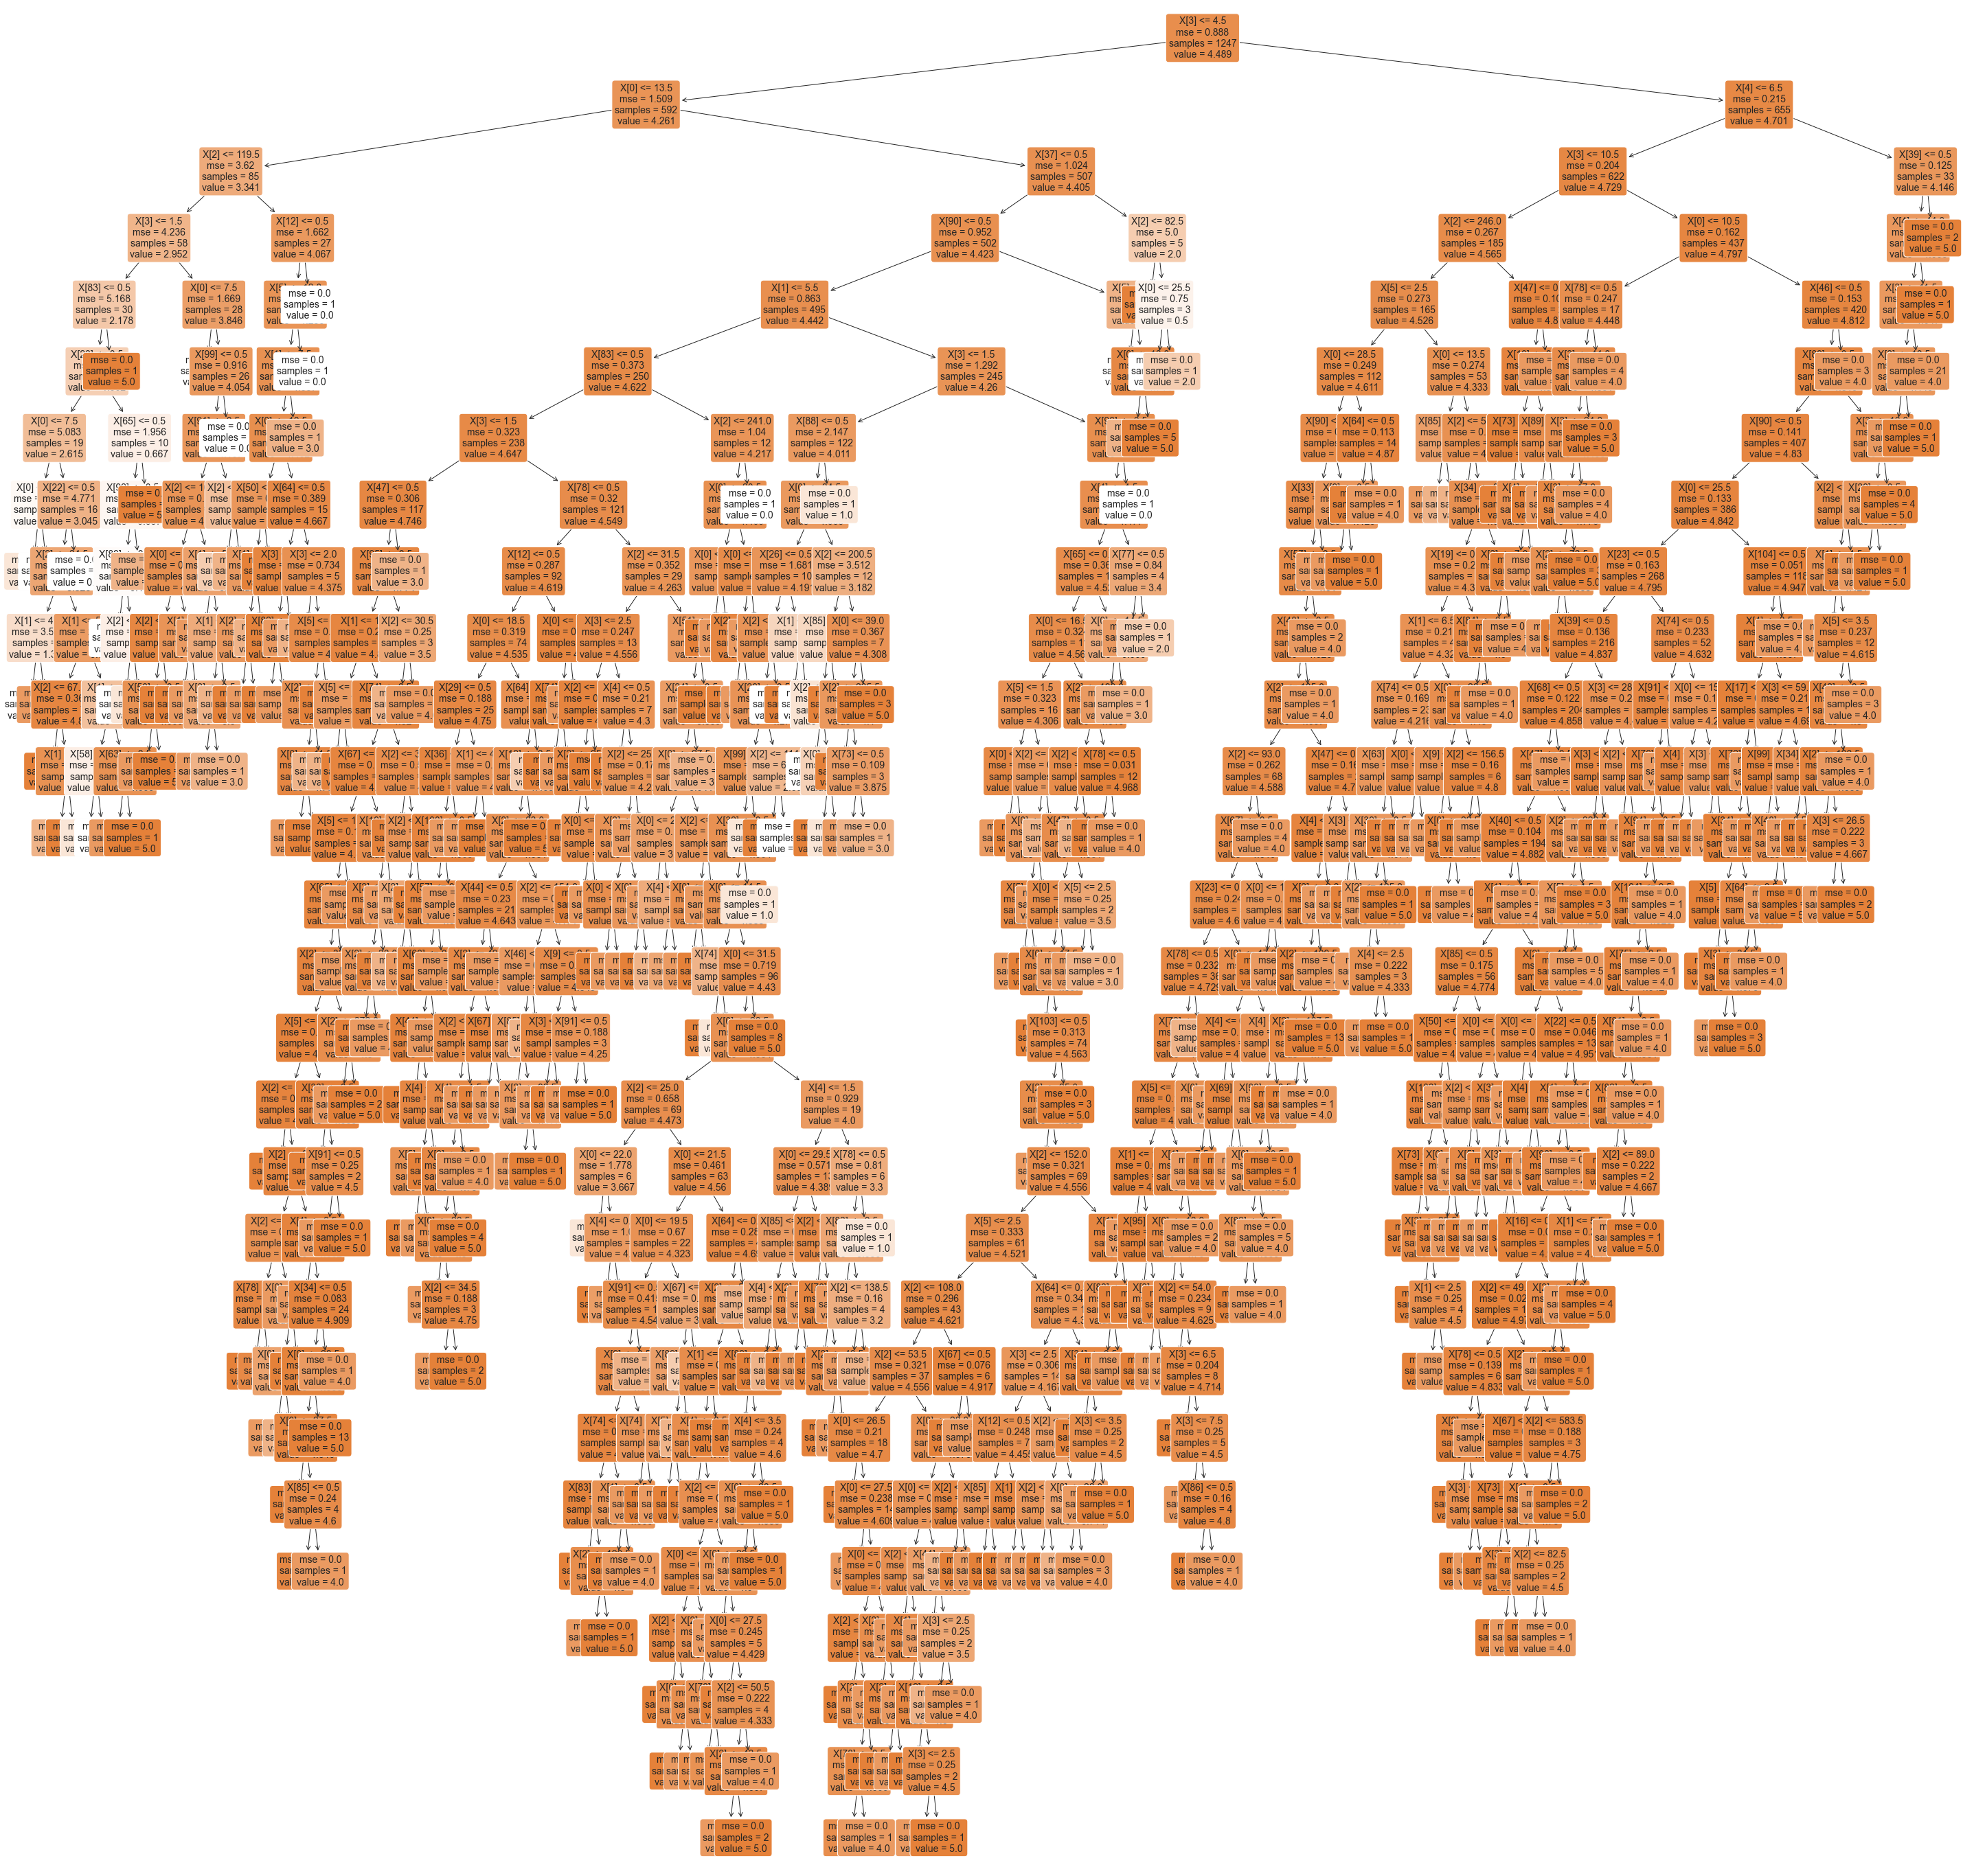

In [28]:
X = pd.DataFrame(air_ohe.drop('ratings',axis=1))
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2)

# Pull out one tree from the forest
regressor = RandomForestRegressor(n_estimators = 2500, random_state = 42,warm_start = True)
regressor.fit(X_train, y_train)
Tree = regressor.estimators_[2]

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [29]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8581523813033183
Mean Squared Error (MSE) 	: 0.13104934769574428

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.19874060575978292
Mean Squared Error (MSE) 	: 0.8027180879157194

